In [118]:
%store -r
df 


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Obesity,HBP
58200,83048,22544,1,169,35.0,140,90,2,1,0,0,1,1,12.254473,1,4
16322,23318,21872,1,165,35.0,100,70,1,1,0,0,1,0,12.855831,1,1
38417,54851,21809,1,154,32.0,110,60,1,1,0,0,1,0,13.493001,1,1
9487,13518,20958,2,172,40.0,140,90,1,2,0,0,1,1,13.520822,1,4
10447,14908,22007,1,162,38.0,100,70,1,1,0,0,1,0,14.479500,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,4825,14585,1,159,159.0,100,80,1,1,0,0,1,0,62.893082,5,3
51909,74028,23228,1,142,129.0,140,90,1,3,0,0,1,1,63.975402,5,4
2458,3470,23646,2,159,165.0,130,70,1,1,0,0,0,0,65.266406,5,3
20092,28683,20656,2,165,178.0,120,80,1,1,1,1,1,0,65.381084,5,3


In [119]:
df1=df.drop(columns=["ap_hi", "ap_lo", "height", "weight", "BMI"])
df2=df.drop(columns=["Obesity", "HBP", "height", "weight"])
df1

,id,age,gender,cholesterol,gluc,smoke,alco,active,cardio,Obesity,HBP
58200,83048,22544,1,2,1,0,0,1,1,1,4
16322,23318,21872,1,1,1,0,0,1,0,1,1
38417,54851,21809,1,1,1,0,0,1,0,1,1
9487,13518,20958,2,1,2,0,0,1,1,1,4
10447,14908,22007,1,1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3413,4825,14585,1,1,1,0,0,1,0,5,3
51909,74028,23228,1,1,3,0,0,1,1,5,4
2458,3470,23646,2,1,1,0,0,0,0,5,3
20092,28683,20656,2,1,1,1,1,1,0,5,3


In [120]:
import pandas as pd
df1 = pd.get_dummies(df1, columns=["Obesity", "HBP", "gender"])
df2 = pd.get_dummies(df2, columns=["gender"])
df1.head()

,id,age,cholesterol,gluc,smoke,alco,active,cardio,Obesity_1,Obesity_2,Obesity_3,Obesity_4,Obesity_5,HBP_1,HBP_2,HBP_3,HBP_4,HBP_5,gender_1,gender_2
58200,83048,22544,2,1,0,0,1,1,True,False,False,False,False,False,False,False,True,False,True,False
16322,23318,21872,1,1,0,0,1,0,True,False,False,False,False,True,False,False,False,False,True,False
38417,54851,21809,1,1,0,0,1,0,True,False,False,False,False,True,False,False,False,False,True,False
9487,13518,20958,1,2,0,0,1,1,True,False,False,False,False,False,False,False,True,False,False,True
10447,14908,22007,1,1,0,0,1,0,True,False,False,False,False,True,False,False,False,False,True,False


In [121]:
from sklearn.model_selection import train_test_split

X1, y1 = df1.drop("cardio", axis=1), df1["cardio"]
X2, y2 = df2.drop("cardio", axis=1), df2["cardio"]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=42)

X1_val, X1_test, y1_val, y1_test = train_test_split(X1_test, y1_test, test_size=0.5, random_state=42)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_test, y2_test, test_size=0.5, random_state=42)

print(X1_train.shape, X1_val.shape, X1_test.shape, y1_train.shape, y1_val.shape, y1_test.shape)
print(X2_train.shape, X2_val.shape, X2_test.shape, y2_train.shape, y2_val.shape, y2_test.shape)

(40162, 19) (13388, 19) (13388, 19) (40162,) (13388,) (13388,)
(40162, 12) (13388, 12) (13388, 12) (40162,) (13388,) (13388,)


In [122]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
sX1_train = scaler.fit_transform(X1_train)
sX1_val = scaler.transform(X1_val)
sX1_test = scaler.transform(X1_test)

sX2_train = scaler.fit_transform(X2_train)
sX2_val = scaler.transform(X2_val)
sX2_test = scaler.transform(X2_test)

scaler = MinMaxScaler()
scaler.fit(sX1_train)
snX1_train=scaler.transform(sX1_train)
snX1_test=scaler.transform(sX1_test)
snX1_val=scaler.transform(sX1_val)

scaler.fit(sX2_train)
snX2_train=scaler.transform(sX2_train)
snX2_test=scaler.transform(sX2_test)
snX2_val=scaler.transform(sX2_val)




In [123]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN1 = KNeighborsClassifier(n_neighbors=10)
model_KNN1.fit(snX1_train, y1_train)

y1_pred = model_KNN1.predict(snX1_val)
y1_pred


array([1, 0, 1, ..., 1, 0, 1], shape=(13388,))

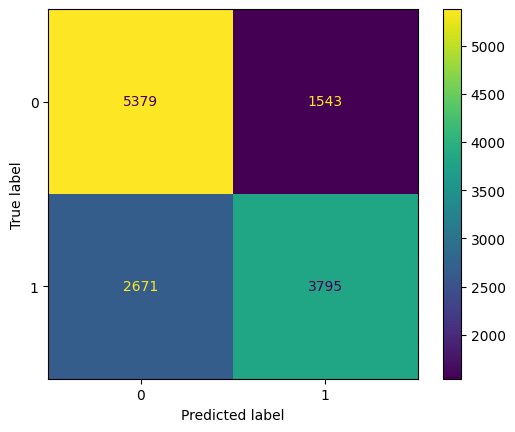

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

cm1=confusion_matrix(y1_val, y1_pred)
ConfusionMatrixDisplay(cm1).plot()

In [125]:
print(classification_report(y1_val, y1_pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72      6922
           1       0.71      0.59      0.64      6466

    accuracy                           0.69     13388
   macro avg       0.69      0.68      0.68     13388
weighted avg       0.69      0.69      0.68     13388



In [126]:
model_KNN2 = KNeighborsClassifier(n_neighbors=10)
model_KNN2.fit(snX2_train, y2_train)

y2_pred = model_KNN2.predict(snX2_val)
y2_pred

array([1, 0, 1, ..., 1, 0, 1], shape=(13388,))

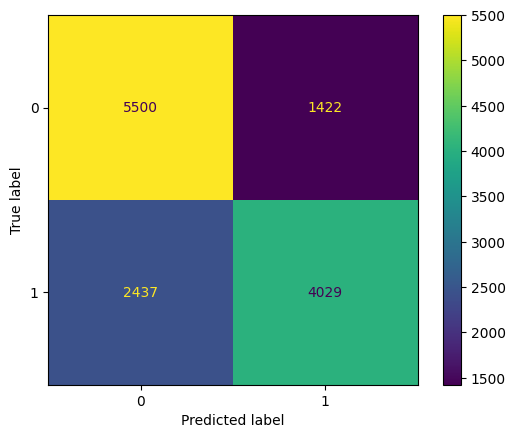

In [127]:
cm2=confusion_matrix(y2_val, y2_pred)
ConfusionMatrixDisplay(cm2).plot()

In [128]:
print(classification_report(y2_val, y2_pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74      6922
           1       0.74      0.62      0.68      6466

    accuracy                           0.71     13388
   macro avg       0.72      0.71      0.71     13388
weighted avg       0.72      0.71      0.71     13388



In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe_KNN=Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])
param_grid_KNN = {"knn__n_neighbors": list(range(10,11))}

classifier_KNN = GridSearchCV(estimator=pipe_KNN, param_grid=param_grid_KNN, scoring="accuracy")

classifier_KNN.fit(snX1_train, y1_train)


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [10]}, scoring='accuracy')

In [139]:
classifier_KNN.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=10))],
 'transform_input': None,
 'verbose': False,
 'scaler': MinMaxScaler(),
 'knn': KNeighborsClassifier(n_neighbors=10),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 10,
 'knn__p': 2,
 'knn__weights': 'uniform'}

              precision    recall  f1-score   support

           0       0.67      0.78      0.72      6922
           1       0.71      0.59      0.64      6466

    accuracy                           0.69     13388
   macro avg       0.69      0.68      0.68     13388
weighted avg       0.69      0.69      0.68     13388



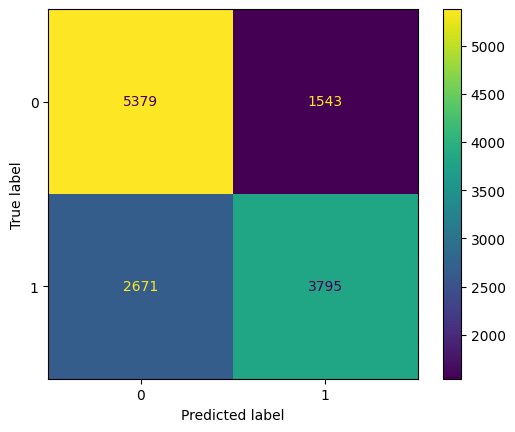

In [140]:
y1_pred=classifier_KNN.predict(snX1_val)
print(classification_report(y1_val, y1_pred))
cm=confusion_matrix(y1_val, y1_pred)
ConfusionMatrixDisplay(cm).plot()